# Chapter 6- Linear Model Selection and Regularization

In [2]:
# %load ../standard_import.txt
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ##数据可视化

In [16]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
%matplotlib inline
plt.style.use('seaborn-white')

In [17]:
import glmnet as gln

## Lab 2
** Load the data **

In [90]:
df=pd.read_csv('./Hitters.csv', index_col=0).dropna()

In [91]:
df.index.name = 'Player'

In [92]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [94]:
dummies=pd.get_dummies(df[['League','Division','NewLeague']]) ## 生成虚拟变量
dummies.info()
print(dummies.head())

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 6 columns):
League_A       263 non-null uint8
League_N       263 non-null uint8
Division_E     263 non-null uint8
Division_W     263 non-null uint8
NewLeague_A    263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: uint8(6)
memory usage: 3.6+ KB
                   League_A  League_N  Division_E  Division_W  NewLeague_A  \
Player                                                                       
-Alan Ashby               0         1           0           1            0   
-Alvin Davis              1         0           0           1            1   
-Andre Dawson             0         1           1           0            0   
-Andres Galarraga         0         1           1           0            0   
-Alfredo Griffin          1         0           0           1            1   

                   NewLeague_N  
Player                          
-Alan Ashby             

In [95]:
y=df.Salary

In [96]:
# drop the columns with the independent variable Salary, and columns for which we created dummy variables
X_=df.drop(['Salary','League','Division','NewLeague'], axis=1).astype('float64')
#define the feature set X
X=pd.concat([X_,dummies[['League_N','Division_W','NewLeague_N']]], axis='columns')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 19 columns):
AtBat          263 non-null float64
Hits           263 non-null float64
HmRun          263 non-null float64
Runs           263 non-null float64
RBI            263 non-null float64
Walks          263 non-null float64
Years          263 non-null float64
CAtBat         263 non-null float64
CHits          263 non-null float64
CHmRun         263 non-null float64
CRuns          263 non-null float64
CRBI           263 non-null float64
CWalks         263 non-null float64
PutOuts        263 non-null float64
Assists        263 non-null float64
Errors         263 non-null float64
League_N       263 non-null uint8
Division_W     263 non-null uint8
NewLeague_N    263 non-null uint8
dtypes: float64(16), uint8(3)
memory usage: 35.7+ KB


## Load the training data and test data

In [97]:
X_train=pd.read_csv('./Hitter_X_train.csv', index_col=0)
X_test=pd.read_csv('./Hitter_X_test.csv', index_col=0)

In [98]:
y_test=pd.read_csv('./Hitter_y_test.csv',index_col=0)
y_train=pd.read_csv('./Hitter_y_train.csv', index_col=0)

## Ridge Regression
** Scikit-learn **

In [101]:
alphas=10**np.linspace(10,-2,100)*0.5

In [102]:
ridge=Ridge()
coefs=[]

In [103]:
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X),y)
    coefs.append(ridge.coef_)

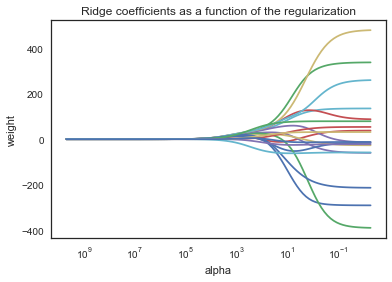

In [104]:
##Plotting the results
ax=plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
#reverse axis
ax.set_xlim(ax.get_xlim()[::-1])

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weight')
plt.title('Ridge coefficients as a function of the regularization')

** Alpha=4**

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)

In [106]:
ridge2 = Ridge(alpha=len(X_)*11498/2)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)

193147.46143016344

In [107]:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

AtBat          0.015146
Hits           0.016050
HmRun          0.013561
Runs           0.015681
RBI            0.016782
Walks          0.019662
Years          0.010390
CAtBat         0.016570
CHits          0.017627
CHmRun         0.015072
CRuns          0.018771
CRBI           0.016697
CWalks         0.016821
PutOuts        0.003228
Assists       -0.007600
Errors         0.013672
League_N       0.003519
Division_W     0.003339
NewLeague_N    0.003499
dtype: float64

** Alpha=$10^{10}$ **

#### This big penalty shrinks the coefficients to a very large degree and makes the model more biased, resulting in a higher MSE

In [108]:
ridge2.set_params(alpha=10**10)
ridge2.fit(scale(X_train), y_train)
pred=ridge2.predict(scale(X_test))
mean_squared_error(y_test, pred)

193253.09741651407